# Towards Robust Interpretability with Self-Explaining Neural Networks

Authors: *Rico Mossinkoff, Yke Rusticus, Roberto Schiavone, Ewoud Vermeij*

In [1]:
import warnings
warnings.filterwarnings("ignore")

from api import mnist, compas
from api.load import load_compas, load_mnist, RegLambda, HType, NConcepts

  1%|          | 76/6172 [00:00<00:08, 742.29it/s]

Loading MNIST model grad3_Hinput_Thsimple_Reg1e-04_LR0.0002:
> conceptizer type        = input
> regularization strength = 1e-04
/home/roberto/Workspace/FACT-AI/SENN/data/fairml/doc/example_notebooks/propublica_data_for_fairml.csv


100%|██████████| 6172/6172 [00:04<00:00, 1426.42it/s]


Number of zero denom distances: 143936 (50.10%)
[2, 3]
saving


## MNIST
For the MNIST dataset, it is possible to load various models specifying the following parameters to the `load_mnist` function:
- `h_type=HType.INPUT` and `reg_lambda`
- `h_type=HType.CNN`, `reg_lambda` and `n_concepts`

If `load_mnist` is called with `h_type=HType.INPUT` and `n_concepts`, `n_concepts` is safely ignored.

The default parameters for MNIST are `h_type=HType.INPUT`, `n_concepts=NConcepts.FIVE` and `reg_lambda=RegLambda.E4`

The possible values for each parameter are shown below.

In [2]:
print('h_type possible values:')
for x in HType:
    print(x)

h_type possible values:
HType.CNN
HType.INPUT


In [3]:
print('reg_lambda possible values:')
for x in RegLambda:
    value = ('{:0.0e}' if x.value != 0 and x.value != 1 else '{}').format(x.value)
    print(str(x) + ': ' + value)

reg_lambda possible values:
RegLambda.ZERO: 0
RegLambda.E4: 1e-04
RegLambda.E3: 1e-03
RegLambda.E2: 1e-02
RegLambda.E1: 1e-01
RegLambda.ONE: 1


In [4]:
print('n_concepts possible values:')
for x in NConcepts:
    print(str(x) + ': ' + str(x.value))

n_concepts possible values:
NConcepts.FIVE: 5
NConcepts.TWENTY: 20


In [5]:
model = load_mnist(n_concepts=NConcepts.TWENTY)
# equivalent
# model = load_mnist(reg_lambda=RegLambda.E4, h_type=HType.CNN, n_concepts=NConcepts.FIVE)

Loading MNIST model grad3_Hcnn_Thsimple_Cpts20_Reg1e-04_Sp2e-05_LR0.0002:
> conceptizer type        = cnn
> number of concepts      = 20
> sparsity parameter      = 2e-05
> regularization strength = 1e-04


In [6]:
n = 3
x = mnist.get_digit_image(n)

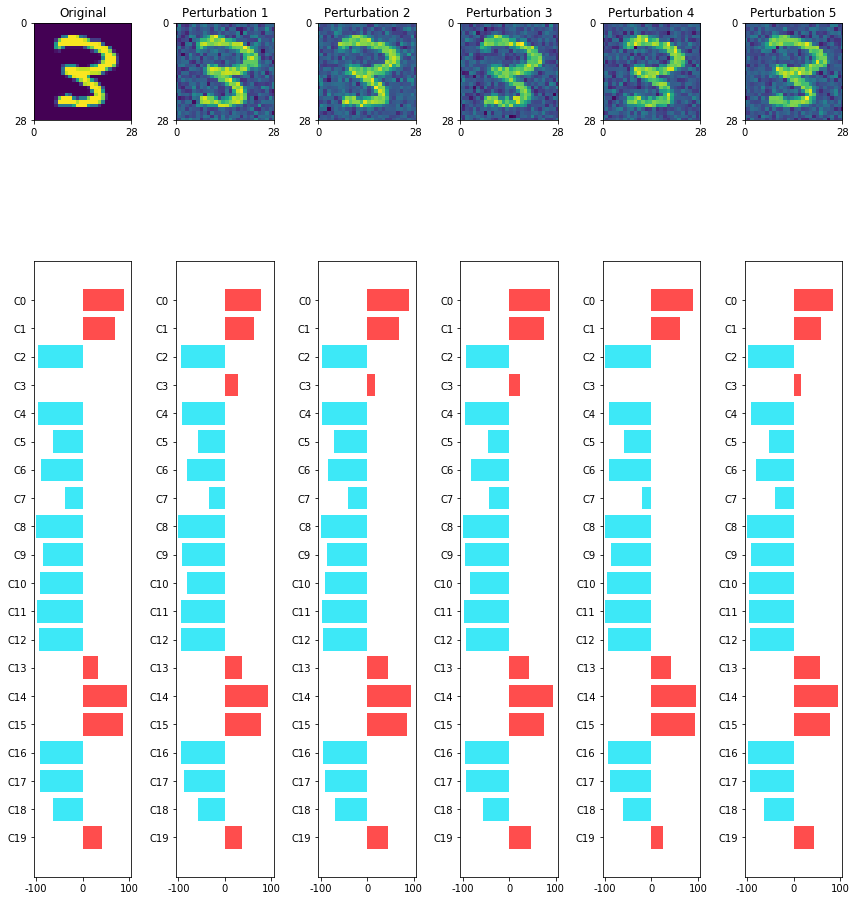

In [7]:
mnist.plot_digit_noise_activation(model, n, 5)

In [8]:
mnist.plot_digit_stability_concept_grid(model, 5)

AttributeError: module 'api.mnist' has no attribute 'plot_digit_stability_concept_grid'

In [ ]:
model = load_compas(RegLambda.ONE)

In [ ]:
x = {
    'Two_yr_Recidivism': 1., 
     'Number_of_Priors': 1.,
     'Age_Above_FourtyFive': 1.,
     'Age_Below_TwentyFive':1.,
     'African_American': 1.,
     'Asian': 1., 
     'Hispanic': 1.,
     'Native_American': 1.,
     'Other':1.,
     'Female': 0.,
     'Misdemeanor': 1.
    }

In [ ]:
compas.plot_lipschitz_feature(model, x)